In [1]:
from google.colab import drive
drive.mount("/content/drive/")

import os
if os.path.exists('/content/drive/MyDrive/COMS_6998'):
     os.chdir('/content/drive/MyDrive/COMS_6998')
print("current working directory:", os.getcwd())

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
current working directory: /content/drive/MyDrive/COMS_6998


In [2]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [3]:
#Load data
df = pd.read_csv("climate_and_yield_data_by_country_for_modelling.csv")

variable_list = ['cloud_cover', 'snow_thickness', '2m_temperature', '10m_wind_speed', '2m_dewpoint_temperature']
months = ['01', '02', '03','04', '05', '06','07', '08', '09','10', '11', '12']

In [4]:
#function to run Linear Regression
def run_linear_model(y_train, X_train, y_test, X_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print("Linear Regression: Score:", lr.score(X_test, y_test), ", MSE:", mean_squared_error(y_test, y_pred))

In [5]:
#function to run Support Vector Regression
def run_svr_model(y_train, X_train, y_test, X_test, kern):
    svr = SVR(kernel=kern)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    print(kern, "SVR: Score:", svr.score(X_test, y_test), ", MSE:", mean_squared_error(y_test, y_pred))

In [6]:
#function to run Random Forest
def run_random_forest(y_train, X_train, y_test, X_test):
    rf = RandomForestRegressor(random_state = 2)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print("Random Forest: Score:", rf.score(X_test, y_test), ", MSE:", mean_squared_error(y_test, y_pred))

In [7]:
#function to run Ridge Linear Regression
def run_ridge_regression(y_train, X_train, y_test, X_test, al):
    ridge_model = Ridge(alpha = al)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    print("Ridge Regression: Score:", ridge_model.score(X_test, y_test), ", MSE:", mean_squared_error(y_test, y_pred))

In [8]:
#function to run Lasso Linear Regression
def run_lasso_regression(y_train, X_train, y_test, X_test, al):
    lasso_model = Lasso(alpha = al)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    print("Lasso Regression: Score:", lasso_model.score(X_test, y_test), ", MSE:", mean_squared_error(y_test, y_pred))

In [9]:
#function for GridSearch CV
def run_grid_search_CV(model, param_grid, refit, X_train, X_test, y_train, y_test):
    grid = GridSearchCV(model, param_grid, refit = True)
    grid.fit(X_train, y_train)
    print("Best parameters:", grid.best_params_, "Best estimator:", grid.best_estimator_)
    grid_preds = grid.predict(X_test)
    print(model, "Score:", grid.score(X_test, y_test), "MSE:", mean_squared_error(y_test, grid_preds))
    return(grid.best_params_, grid.best_estimator_)

In [10]:
#function for RandomSearch CV
def run_random_search_CV(model, param_grid, refit, X_train, X_test, y_train, y_test, n_iter):
    rs = RandomizedSearchCV(model, param_grid, refit = True, n_iter = n_iter)
    rs.fit(X_train, y_train)
    print("Best parameters:", rs.best_params_, "Best estimator:", rs.best_estimator_)
    rs_preds = rs.predict(X_test)
    print(model, "Score:", rs.score(X_test, y_test), "MSE:", mean_squared_error(y_test, rs_preds))
    return(rs.best_params_, rs.best_estimator_)

In [11]:
#function for 5-Fold CV

Predicting Yield

In [12]:
#Models with country and production
X = df[["Country_cat", "Production"]]
Y = df["Yield"]
tst_size = 0.2
rand_st = 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = tst_size, random_state = rand_st)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

run_linear_model(y_train, scaled_X_train, y_test, scaled_X_test)
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "linear")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "poly")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "rbf")
run_random_forest(y_train, scaled_X_train, y_test, scaled_X_test)


#GridSearch CV on SVR 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf']} 
yield_svr_grid_base = run_grid_search_CV(SVR(), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test)


#GridSearch CV on Random Forest
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
              'max_depth': [10,20,30,40,50],
              'bootstrap': [True, False]}
yield_rf_grid_base = run_grid_search_CV(RandomForestRegressor(random_state = 7), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test)

#Randomized Search CV on Random Forest
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
              'max_depth': [10,20,30,40,50],
              'bootstrap': [True, False]}
yield_rs_base = run_random_search_CV(RandomForestRegressor(random_state = 7), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test, n_iter = 100)

Linear Regression: Score: 0.21696795435303928 , MSE: 3036880657.2569747
linear SVR: Score: -0.06717056488864137 , MSE: 4138872303.5295787
poly SVR: Score: 0.0794534317539688 , MSE: 3570211567.651581
rbf SVR: Score: -0.07139078142461752 , MSE: 4155239825.189503
Random Forest: Score: 0.9328551448606976 , MSE: 260411962.6271396
Best parameters: {'C': 1000, 'gamma': 1, 'kernel': 'linear'} Best estimator: SVR(C=1000, gamma=1, kernel='linear')
SVR() Score: 0.17620769096378142 MSE: 3194963658.0226245
Best parameters: {'bootstrap': True, 'max_depth': 10, 'n_estimators': 100} Best estimator: RandomForestRegressor(max_depth=10, random_state=7)
RandomForestRegressor(random_state=7) Score: 0.9407499053447979 MSE: 229793234.388461
Best parameters: {'n_estimators': 100, 'max_depth': 10, 'bootstrap': True} Best estimator: RandomForestRegressor(max_depth=10, random_state=7)
RandomForestRegressor(random_state=7) Score: 0.9407499053447979 MSE: 229793234.388461


In [13]:
#Models with country, production and annual aggregates
X = df[["Country_cat", "Production", 'cloud_cover', 'snow_thickness', '2m_temperature', '10m_wind_speed', '2m_dewpoint_temperature']]
Y = df["Yield"]
tst_size = 0.2
rand_st = 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = tst_size, random_state = rand_st)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

run_linear_model(y_train, scaled_X_train, y_test, scaled_X_test)
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "linear")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "poly")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "rbf")
run_random_forest(y_train, scaled_X_train, y_test, scaled_X_test)

#GridSearch CV on Random Forest
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
              'max_depth': [10,20,30,40,50],
              'bootstrap': [True, False]}
yield_rf_grid_annual = run_grid_search_CV(RandomForestRegressor(random_state = 7), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test)

#Randomized Search CV on Random Forest
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
              'max_depth': [10,20,30,40,50],
              'bootstrap': [True, False]}
yield_rs_annual = run_random_search_CV(RandomForestRegressor(random_state = 7), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test, n_iter = 100)

Linear Regression: Score: 0.6111478156504622 , MSE: 1508109002.3685398
linear SVR: Score: -0.05270956165085172 , MSE: 4082787317.913071
poly SVR: Score: -0.053949503953661715 , MSE: 4087596261.322798
rbf SVR: Score: -0.07088842675983531 , MSE: 4153291512.6357055
Random Forest: Score: 0.9566367252536372 , MSE: 168178417.5304654
Best parameters: {'bootstrap': True, 'max_depth': 30, 'n_estimators': 50} Best estimator: RandomForestRegressor(max_depth=30, n_estimators=50, random_state=7)
RandomForestRegressor(random_state=7) Score: 0.9527756037143686 MSE: 183153239.29300883
Best parameters: {'n_estimators': 50, 'max_depth': 30, 'bootstrap': True} Best estimator: RandomForestRegressor(max_depth=30, n_estimators=50, random_state=7)
RandomForestRegressor(random_state=7) Score: 0.9527756037143686 MSE: 183153239.29300883


In [14]:
#Models with country, production, area, and three seasons
x_var = ["Country_cat", "Production"]
for variable in variable_list:
    x_var += [variable+"_g0", variable+"_g1", variable+"_g2"]
X = df[x_var]
Y = df["Yield"]
tst_size = 0.2
rand_st = 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = tst_size, random_state = rand_st)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

run_linear_model(y_train, scaled_X_train, y_test, scaled_X_test)
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "linear")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "poly")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "rbf")
run_random_forest(y_train, scaled_X_train, y_test, scaled_X_test)

#GridSearch CV on Random Forest
param_grid = {'n_estimators': [10,20,25,30,50],
              'max_depth': [10,20,30]}
yield_rf_grid_seasonal = run_grid_search_CV(RandomForestRegressor(random_state = 7), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test)

#Randomized Search CV on Random Forest
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
              'max_depth': [10,20,30,40,50],
              'bootstrap': [True, False]}
yield_rs_base_seasonal = run_random_search_CV(RandomForestRegressor(random_state = 7), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test, n_iter = 100)

Linear Regression: Score: 0.6408251538147816 , MSE: 1393009582.4519117
linear SVR: Score: -0.04477177593197146 , MSE: 4052001722.2977586
poly SVR: Score: -0.06711739934129834 , MSE: 4138666108.363932
rbf SVR: Score: -0.07101825029095532 , MSE: 4153795015.1075478
Random Forest: Score: 0.9215890114468756 , MSE: 304106090.90287864
Best parameters: {'max_depth': 10, 'n_estimators': 30} Best estimator: RandomForestRegressor(max_depth=10, n_estimators=30, random_state=7)
RandomForestRegressor(random_state=7) Score: 0.9274339977922705 MSE: 281437125.98255366
Best parameters: {'n_estimators': 30, 'max_depth': 10, 'bootstrap': True} Best estimator: RandomForestRegressor(max_depth=10, n_estimators=30, random_state=7)
RandomForestRegressor(random_state=7) Score: 0.9274339977922705 MSE: 281437125.98255366


In [15]:
#Ridge and Lasso Linear Regression with monthly aggregates
x_var = ["Country_cat", "Production"] + [variable + "_" + m for m in months for variable in variable_list]
df[x_var]
Y = df["Yield"]
tst_size = 0.2
rand_st = 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = tst_size, random_state = rand_st)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

run_ridge_regression(y_train, scaled_X_train, y_test, scaled_X_test, 0.5)
run_lasso_regression(y_train, scaled_X_train, y_test, scaled_X_test, 0.5)
run_linear_model(y_train, scaled_X_train, y_test, scaled_X_test)
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "linear")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "poly")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "rbf")
run_random_forest(y_train, scaled_X_train, y_test, scaled_X_test)

Ridge Regression: Score: 0.6411976792768245 , MSE: 1391564794.3665414
Lasso Regression: Score: 0.6408458435202171 , MSE: 1392929340.3129203
Linear Regression: Score: 0.6408251538147816 , MSE: 1393009582.4519117
linear SVR: Score: -0.04477177593197146 , MSE: 4052001722.2977586
poly SVR: Score: -0.06711739934129834 , MSE: 4138666108.363932
rbf SVR: Score: -0.07101825029095532 , MSE: 4153795015.1075478
Random Forest: Score: 0.9215890114468756 , MSE: 304106090.90287864


Predicting Production

In [16]:
#Models with country and yield
X = df[["Country_cat", "Yield", "Area harvested"]]
Y = df["Production"]
tst_size = 0.2
rand_st = 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = tst_size, random_state = rand_st)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

run_linear_model(y_train, scaled_X_train, y_test, scaled_X_test)
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "linear")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "poly")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "rbf")
run_random_forest(y_train, scaled_X_train, y_test, scaled_X_test)


#GridSearch CV on SVR 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf']} 
production_svr_grid_base = run_grid_search_CV(SVR(), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test)


#GridSearch CV on Random Forest
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
              'max_depth': [10,20,30,40,50],
              'bootstrap': [True, False]}
production_rf_grid_base = run_grid_search_CV(RandomForestRegressor(random_state = 7), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test)

#Randomized Search CV on Random Forest
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
              'max_depth': [10,20,30,40,50],
              'bootstrap': [True, False]}
production_rs_base = run_random_search_CV(RandomForestRegressor(random_state = 7), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test, n_iter = 100)

Linear Regression: Score: 0.9742350044516017 , MSE: 18678029682693.445
linear SVR: Score: -0.07976801963861657 , MSE: 782765092404099.9
poly SVR: Score: -0.07939166882361981 , MSE: 782492261318978.4
rbf SVR: Score: -0.07978995243129927 , MSE: 782780992323507.1
Random Forest: Score: 0.9966607238131161 , MSE: 2420768892436.576
Best parameters: {'C': 1000, 'gamma': 1, 'kernel': 'poly'} Best estimator: SVR(C=1000, gamma=1, kernel='poly')
SVR() Score: 0.9648265554528905 MSE: 25498573832834.383
Best parameters: {'bootstrap': False, 'max_depth': 20, 'n_estimators': 10} Best estimator: RandomForestRegressor(bootstrap=False, max_depth=20, n_estimators=10,
                      random_state=7)
RandomForestRegressor(random_state=7) Score: 0.9947222885974023 MSE: 3826014642588.9033
Best parameters: {'n_estimators': 10, 'max_depth': 20, 'bootstrap': False} Best estimator: RandomForestRegressor(bootstrap=False, max_depth=20, n_estimators=10,
                      random_state=7)
RandomForestRegresso

In [17]:
#Models with country, yield, production, area, and annual aggregates
X = df[["Country_cat", "Yield", "Area harvested", 'cloud_cover', 'snow_thickness', '2m_temperature', '10m_wind_speed', '2m_dewpoint_temperature']]
Y = df["Production"]
tst_size = 0.2
rand_st = 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = tst_size, random_state = rand_st)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

run_linear_model(y_train, scaled_X_train, y_test, scaled_X_test)
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "linear")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "poly")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "rbf")
run_random_forest(y_train, scaled_X_train, y_test, scaled_X_test)

#GridSearch CV on Random Forest
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
              'max_depth': [10,20,30,40,50],
              'bootstrap': [True, False]}
production_rf_grid_annual = run_grid_search_CV(RandomForestRegressor(random_state = 7), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test)

#Randomized Search CV on Random Forest
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
              'max_depth': [10,20,30,40,50],
              'bootstrap': [True, False]}
production_rs_annual = run_random_search_CV(RandomForestRegressor(random_state = 7), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test, n_iter = 100)

Linear Regression: Score: 0.9765253978347792 , MSE: 17017636009592.496
linear SVR: Score: -0.07976095275215234 , MSE: 782759969348095.5
poly SVR: Score: -0.07974584211341251 , MSE: 782749015068737.0
rbf SVR: Score: -0.07979080354704204 , MSE: 782781609329827.9
Random Forest: Score: 0.9961274989615829 , MSE: 2807323960368.831
Best parameters: {'bootstrap': False, 'max_depth': 10, 'n_estimators': 80} Best estimator: RandomForestRegressor(bootstrap=False, max_depth=10, n_estimators=80,
                      random_state=7)
RandomForestRegressor(random_state=7) Score: 0.9944540243652705 MSE: 4020489634100.1235
Best parameters: {'n_estimators': 80, 'max_depth': 10, 'bootstrap': False} Best estimator: RandomForestRegressor(bootstrap=False, max_depth=10, n_estimators=80,
                      random_state=7)
RandomForestRegressor(random_state=7) Score: 0.9944540243652705 MSE: 4020489634100.1235


In [18]:
#Models with country, yield, production, area, and three seasons
x_var = ["Country_cat", "Yield", "Area harvested"]
for variable in variable_list:
    x_var += [variable+"_g0", variable+"_g1", variable+"_g2"]
X = df[x_var]
Y = df["Production"]
tst_size = 0.2
rand_st = 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = tst_size, random_state = rand_st)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

run_linear_model(y_train, scaled_X_train, y_test, scaled_X_test)
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "linear")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "poly")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "rbf")
run_random_forest(y_train, scaled_X_train, y_test, scaled_X_test)

#GridSearch CV on Random Forest
param_grid = {'n_estimators': [10,20,25,30,50],
              'max_depth': [10,20,30]}
production_rf_grid_seasonal = run_grid_search_CV(RandomForestRegressor(random_state = 7), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test)

#Randomized Search CV on Random Forest
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
              'max_depth': [10,20,30,40,50],
              'bootstrap': [True, False]}
production_rs_base_seasonal = run_random_search_CV(RandomForestRegressor(random_state = 7), param_grid, True, scaled_X_train, scaled_X_test, y_train, y_test, n_iter = 100)

Linear Regression: Score: 0.9800539939589633 , MSE: 14459621861212.633
linear SVR: Score: -0.07975039869491307 , MSE: 782752318308761.2
poly SVR: Score: -0.07978350798262879 , MSE: 782776320496441.4
rbf SVR: Score: -0.07979043652707829 , MSE: 782781343263033.4
Random Forest: Score: 0.9948288721380376 , MSE: 3748748161718.271
Best parameters: {'max_depth': 10, 'n_estimators': 50} Best estimator: RandomForestRegressor(max_depth=10, n_estimators=50, random_state=7)
RandomForestRegressor(random_state=7) Score: 0.9949359579095688 MSE: 3671117594482.3057
Best parameters: {'n_estimators': 30, 'max_depth': 10, 'bootstrap': False} Best estimator: RandomForestRegressor(bootstrap=False, max_depth=10, n_estimators=30,
                      random_state=7)
RandomForestRegressor(random_state=7) Score: 0.9939297670224977 MSE: 4400543812308.254


In [19]:
#Ridge and Lasso Linear Regression with monthly aggregates
x_var = ["Country_cat", "Yield", "Area harvested"] + [variable + "_" + m for m in months for variable in variable_list]
df[x_var]
Y = df["Yield"]
tst_size = 0.2
rand_st = 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = tst_size, random_state = rand_st)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

run_ridge_regression(y_train, scaled_X_train, y_test, scaled_X_test, 0.5)
run_lasso_regression(y_train, scaled_X_train, y_test, scaled_X_test, 0.5)
run_linear_model(y_train, scaled_X_train, y_test, scaled_X_test)
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "linear")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "poly")
run_svr_model(y_train, scaled_X_train, y_test, scaled_X_test, "rbf")
run_random_forest(y_train, scaled_X_train, y_test, scaled_X_test)

Ridge Regression: Score: 0.9999982622378364 , MSE: 6739.668358314446
Lasso Regression: Score: 0.9999994814141902 , MSE: 2011.262787707453
Linear Regression: Score: 1.0 , MSE: 1.0686465988629726e-20
linear SVR: Score: -0.0313583691437207 , MSE: 3999979693.506457
poly SVR: Score: -0.06686505182676084 , MSE: 4137687413.6986675
rbf SVR: Score: -0.07081414641447292 , MSE: 4153003426.6687274
Random Forest: Score: 0.996431524690341 , MSE: 13839834.147335203


Predicting Yield for Increased Temperatures

In [20]:
#Using Random Forest model with country, production, area, and annual aggregates based on random search cv parameters
def run_random_forest_best_model_pred(best_params, y_train, X_train, base_vals, scenario_name, mean_temp_change, scaler):
    rf = RandomForestRegressor(random_state = 7, n_estimators = best_params["n_estimators"], max_depth = best_params["max_depth"], bootstrap = best_params["bootstrap"])
    rf.fit(X_train, y_train)
    #update temperature based on mean_temp_change
    new_vals = base_vals.copy()
    new_vals["2m_temperature"] = new_vals["2m_temperature"] + mean_temp_change
    print(new_vals["2m_temperature"])
    base_pred = rf.predict(scaler.transform(base_vals))
    new_pred = rf.predict(scaler.transform(new_vals))
    yield_change = (new_pred - base_pred)/base_pred
    plt.barh(base_vals.index, yield_change)
    plt.title(scenario_name + ": Mean Temperature Change of " + str(mean_temp_change))
    plt.show()

In [21]:
X = df[["Country_cat", "Production", 'cloud_cover', 'snow_thickness', '2m_temperature', '10m_wind_speed', '2m_dewpoint_temperature']]
Y = df["Yield"]
tst_size = 0.2
rand_st = 1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = tst_size, random_state = rand_st)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

base_val = df.loc[(df['Year'] >= 1986) & (df['Year'] <= 2005), ["Country","Country_cat", "Production", 'cloud_cover', 'snow_thickness', '2m_temperature', '10m_wind_speed', '2m_dewpoint_temperature']].groupby('Country').mean()

Country
Angola                         296.325908
Brazil                         296.574875
China                          286.527671
Ethiopia                       298.196803
Haiti                          298.513291
India                          296.830371
Indonesia                      299.217714
Japan                          282.822744
Kenya                          299.054733
Madagascar                     296.527705
Mali                           301.810872
Mozambique                     297.229752
Nigeria                        299.956079
Papua New Guinea               298.045359
Rwanda                         293.186261
Uganda                         296.203365
United Republic of Tanzania    296.366215
United States of America       288.857100
Viet Nam                       296.067498
Name: 2m_temperature, dtype: float64


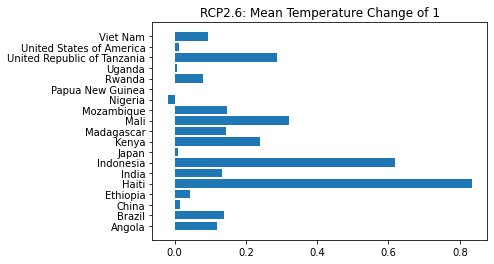

Country
Angola                         296.725908
Brazil                         296.974875
China                          286.927671
Ethiopia                       298.596803
Haiti                          298.913291
India                          297.230371
Indonesia                      299.617714
Japan                          283.222744
Kenya                          299.454733
Madagascar                     296.927705
Mali                           302.210872
Mozambique                     297.629752
Nigeria                        300.356079
Papua New Guinea               298.445359
Rwanda                         293.586261
Uganda                         296.603365
United Republic of Tanzania    296.766215
United States of America       289.257100
Viet Nam                       296.467498
Name: 2m_temperature, dtype: float64


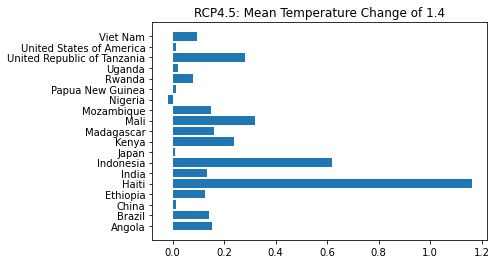

Country
Angola                         296.625908
Brazil                         296.874875
China                          286.827671
Ethiopia                       298.496803
Haiti                          298.813291
India                          297.130371
Indonesia                      299.517714
Japan                          283.122744
Kenya                          299.354733
Madagascar                     296.827705
Mali                           302.110872
Mozambique                     297.529752
Nigeria                        300.256079
Papua New Guinea               298.345359
Rwanda                         293.486261
Uganda                         296.503365
United Republic of Tanzania    296.666215
United States of America       289.157100
Viet Nam                       296.367498
Name: 2m_temperature, dtype: float64


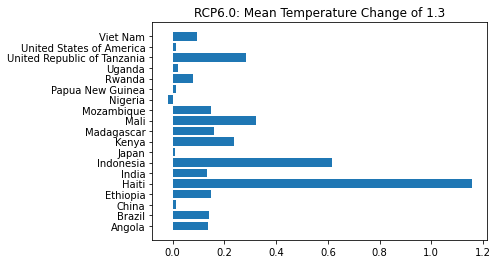

Country
Angola                         297.325908
Brazil                         297.574875
China                          287.527671
Ethiopia                       299.196803
Haiti                          299.513291
India                          297.830371
Indonesia                      300.217714
Japan                          283.822744
Kenya                          300.054733
Madagascar                     297.527705
Mali                           302.810872
Mozambique                     298.229752
Nigeria                        300.956079
Papua New Guinea               299.045359
Rwanda                         294.186261
Uganda                         297.203365
United Republic of Tanzania    297.366215
United States of America       289.857100
Viet Nam                       297.067498
Name: 2m_temperature, dtype: float64


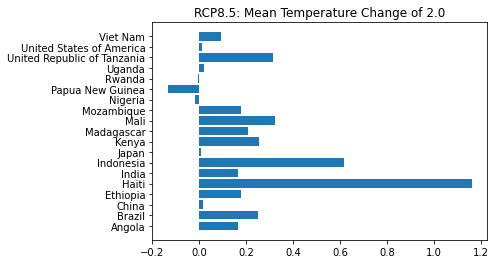

In [22]:
#Predicting for 2046-2065
scenarios = ["RCP2.6", "RCP4.5", "RCP6.0", "RCP8.5"]
mean_temp_changes = [1, 1.4, 1.3, 2.0]

for i in range(len(scenarios)):
    run_random_forest_best_model_pred(yield_rs_annual[0], y_train, scaled_X_train, base_val, scenarios[i], mean_temp_changes[i], scaler)

Country
Angola                         296.325908
Brazil                         296.574875
China                          286.527671
Ethiopia                       298.196803
Haiti                          298.513291
India                          296.830371
Indonesia                      299.217714
Japan                          282.822744
Kenya                          299.054733
Madagascar                     296.527705
Mali                           301.810872
Mozambique                     297.229752
Nigeria                        299.956079
Papua New Guinea               298.045359
Rwanda                         293.186261
Uganda                         296.203365
United Republic of Tanzania    296.366215
United States of America       288.857100
Viet Nam                       296.067498
Name: 2m_temperature, dtype: float64


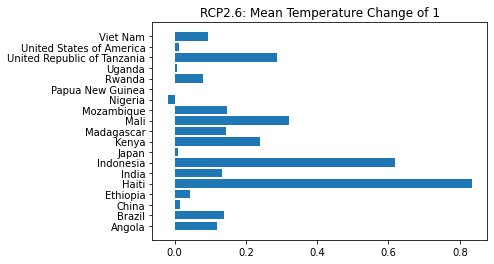

Country
Angola                         297.125908
Brazil                         297.374875
China                          287.327671
Ethiopia                       298.996803
Haiti                          299.313291
India                          297.630371
Indonesia                      300.017714
Japan                          283.622744
Kenya                          299.854733
Madagascar                     297.327705
Mali                           302.610872
Mozambique                     298.029752
Nigeria                        300.756079
Papua New Guinea               298.845359
Rwanda                         293.986261
Uganda                         297.003365
United Republic of Tanzania    297.166215
United States of America       289.657100
Viet Nam                       296.867498
Name: 2m_temperature, dtype: float64


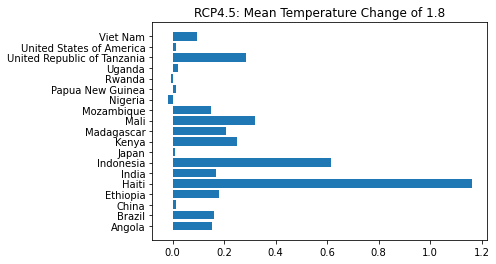

Country
Angola                         297.525908
Brazil                         297.774875
China                          287.727671
Ethiopia                       299.396803
Haiti                          299.713291
India                          298.030371
Indonesia                      300.417714
Japan                          284.022744
Kenya                          300.254733
Madagascar                     297.727705
Mali                           303.010872
Mozambique                     298.429752
Nigeria                        301.156079
Papua New Guinea               299.245359
Rwanda                         294.386261
Uganda                         297.403365
United Republic of Tanzania    297.566215
United States of America       290.057100
Viet Nam                       297.267498
Name: 2m_temperature, dtype: float64


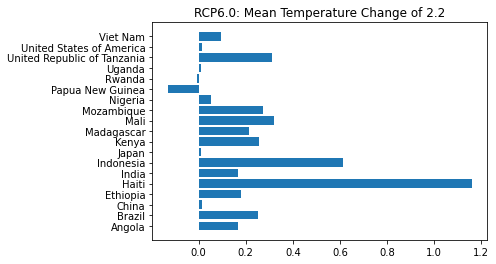

Country
Angola                         299.025908
Brazil                         299.274875
China                          289.227671
Ethiopia                       300.896803
Haiti                          301.213291
India                          299.530371
Indonesia                      301.917714
Japan                          285.522744
Kenya                          301.754733
Madagascar                     299.227705
Mali                           304.510872
Mozambique                     299.929752
Nigeria                        302.656079
Papua New Guinea               300.745359
Rwanda                         295.886261
Uganda                         298.903365
United Republic of Tanzania    299.066215
United States of America       291.557100
Viet Nam                       298.767498
Name: 2m_temperature, dtype: float64


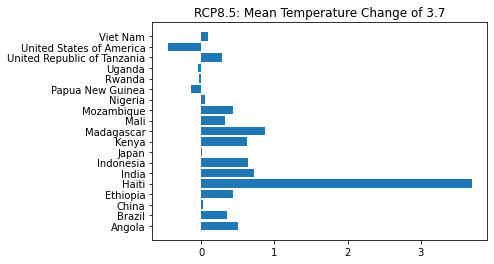

In [23]:
#Predicting for 2081-2100
scenarios = ["RCP2.6", "RCP4.5", "RCP6.0", "RCP8.5"]
mean_temp_changes = [1, 1.8, 2.2, 3.7]

for i in range(len(scenarios)):
    run_random_forest_best_model_pred(yield_rs_annual[0], y_train, scaled_X_train, base_val, scenarios[i], mean_temp_changes[i], scaler)